# **Exploratory Data Analysis with tidyverse and ggplot2**

# Introduction and Objectives
This lab involves using an R notebook to perform exploratory data analysis (EDA) on the SEOUL BIKE SHARING dataset, utilizing the tidyverse and ggplot2 packages. The process begins with minor data preparation, followed by generating and exploring summary statistics from the processed dataframe. Subsequent steps include making observations based on these statistics and creating informative visualizations with ggplot2.

Visualization serves as a powerful tool for understanding data and identifying underlying patterns. Scatterplots, for example, can illustrate the correlation between two features. When variables are highly correlated, they tend to vary similarly, meaning one variable’s variation can partially explain the other's. Such covariates may have causal relationships, where a change in one variable directly causes a change in another; however, correlations do not necessarily imply causation. In some cases, an external factor may influence both variables, or the relationship could be coincidental. Recognizing causal links allows for actionable insights—like controlling a light switch to turn a bulb on or off—where influencing one variable results in a predictable change in the other. This concept is central to advanced data science but goes beyond the scope of this lab.

Visualization also aids in detecting outliers and anomalies. Boxplots are particularly useful for revealing these irregularities, while direct plotting of variables such as time series or spatial data can expose trends and unusual patterns. However, outliers can dominate the scale of plots, making the data appear flat or uninformative, so data cleaning including outlier removal may be necessary for clearer analysis.

A cautionary note: patterns identified in small datasets should be treated skeptically. While any two randomly placed points define a line, the likelihood that additional points align perfectly is low. This underscores an advantage of big data, where observed patterns are more likely to generalize to new data.

With this understanding, the exploratory analysis can proceed to uncover meaningful insights from the dataset.



### For reference, we include the Attribute Information for the `seoul_bike_sharing` dataset:

- DATE - format: "2017-12-01"
- RENTED_BIKE_COUNT - Count of bikes rented at each hour
- HOUR - Hour of the day
- TEMPERATURE - Celsius
- HUMIDITY - %
- Windspeed - m/s
- VISIBILITY - 10m
- DEW_POINT_TEMPERATURE - Celsius
- SOLAR_RADIATION - MJ/m2
- RAINFALL - mm
- SNOWFALL - cm
- SEASONS -  "Autumn","Spring",..
- HOLIDAY - "Holiday", "No holiday"
- FUNCTIONING_DAY - "Yes", "No"



## Load the seoul_bike_sharing data into a dataframe

The dataset can be loaded from the provided URL. Although the dataset is already clean, attention must be paid to data types, particularly date columns, which may require coercion to the appropriate date format. Additionally, categorical variables should be explicitly converted to factor data types to ensure proper handling during analysis and visualization.

```R
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  

```


### Task 1 - Load the dataset
When loading the dataset, the DATE column should be initially read as a character type. This approach allows for explicit control over converting it later to a proper date format as needed during data preparation.

### Solution 1


In [1]:
library(tidyverse)

url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"

seoul_bike_sharing <- read_csv(url,
                               col_types = cols(
                                 DATE = col_character(),
                                 RENTED_BIKE_COUNT = col_double(),
                                 HOUR = col_double(),
                                 TEMPERATURE = col_double(),
                                 HUMIDITY = col_double(),
                                 WIND_SPEED = col_double(),
                                 VISIBILITY = col_double(),
                                 DEW_POINT_TEMPERATURE = col_double(),
                                 SOLAR_RADIATION = col_double(),
                                 RAINFALL = col_double(),
                                 SNOWFALL = col_double(),
                                 SEASONS = col_factor(),
                                 HOLIDAY = col_factor(),
                                 FUNCTIONING_DAY = col_factor()
                               ))


glimpse(seoul_bike_sharing)
head(seoul_bike_sharing)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 8,465
Columns: 14
$ DATE                  <chr> "01/12/2017", "01/12/2017", "01/12/2017", "01/12…
$ RENTED_BIKE_COUNT     <dbl> 254, 204, 173, 107, 78, 100, 181, 460, 930, 490,…
$ HOUR                  <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ TEMPERATURE           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4, …
$ HUMIDITY              <dbl> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21, …
$ WIND_SPEED            <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0.5…
$ VISIBILITY            <dbl> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ DEW_POINT_TEMPERATURE <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.5,…
$ SOLAR_RADIATION       <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ RAINFALL              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SNOWFALL              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SEASONS               <fct> Winter, Winter, Winter, Winter, Winter, Winter, …
$ HOLIDAY       

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### Task 2 - Recast `DATE` as a date
Use the format of the data, namely "%d/%m/%Y".
### Solution 2


In [2]:
seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(DATE = as.Date(DATE, format = "%d/%m/%Y"))

### Task 3 - Cast `HOURS` as a categorical variable
Also, coerce its levels to be an ordered sequence.  This will ensure our visualizations correctly utilize `HOURS` as a discrete variable with the expected ordering.  
### Solution 3


In [3]:
seoul_bike_sharing <- seoul_bike_sharing %>%
  mutate(HOUR = factor(HOUR, levels = 0:23, ordered = TRUE))

### Check the structure of the dataframe


In [4]:
str(seoul_bike_sharing)

tibble [8,465 × 14] (S3: tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : Factor w/ 4 levels "Winter","Spring",..: 1 1 1 1 1 1 1 1 1 1 .

### Finally, ensure there are no missing values


In [5]:
sum(is.na(seoul_bike_sharing))

[1] 0

## Descriptive Statistics

The dataset seoul_bike_sharing is ready for exploration, allowing the generation of high-level summary statistics that provide an overview of its contents, distributions, and potential anomalies. This initial statistical insight forms the foundation for deeper exploratory data analysis and visualization.

### Task 4 - Dataset Summary
Use the base R `sumamry()` function to describe the `seoul_bike_sharing` dataset.

### Solution 4


In [6]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

### Some Basic Observations:
- We can see from `DATE` that we have exactly a full year of data.  
- No records have zero bike counts.  
- Spring and Winter have the same count of records, while autumn has the least and Summer has the most.
- Temperature has a large range, so we might expect it to explain at least some of the variation in bike rentals.  
- Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
- The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze (Google 'Beaufort Wind Scale' to find the different wind descriptions)  

Exploratory Data Analysis often raises more questions than it answers, which is a valuable part of the process. This iterative exploration leads to a deeper understanding of the data’s nuances and complexities, ultimately enriching the overall analysis and guiding subsequent steps more effectively.

### Task 5 - Based on the above stats, calculate how many Holidays there are.
### Solution 5:


In [7]:
table(seoul_bike_sharing$HOLIDAY)


No Holiday    Holiday 
      8057        408 

### Task 6 - Calculate the percentage of records that fall on a holiday.
### Solution 6


In [8]:
holiday_counts <- table(seoul_bike_sharing$HOLIDAY)
holiday_percentage <- (holiday_counts["Holiday"] / sum(holiday_counts)) * 100
holiday_percentage

Holiday 
4.819846

### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have.
### Solution 7


In [9]:
expected_records <- 24 * 365
expected_records

[1] 8760

### Task 8 - Given the observations for the 'FUNCTIONING_DAY' how many records must there be?
### Solution 8


In [10]:
table(seoul_bike_sharing$FUNCTIONING_DAY)


 Yes 
8465 

## Drilling Down
Let's calculate some seasonally aggregated measures to help build some more context.  
### Task 9 - Load the dplyr package, group the data by `SEASONS`, and use the `summarize()` function to calculate the seasonal total rainfall and snowfall.
### Solution 9


In [11]:
library(dplyr)

seasonal_precipitation <- seoul_bike_sharing %>%
  group_by(SEASONS) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )

seasonal_precipitation

SEASONS,total_rainfall,total_snowfall
<fct>,<dbl>,<dbl>
Winter,70.9,534.6
Spring,403.8,0.0
Summer,559.7,0.0
Autumn,227.9,123.0


## Data Visualization

Let's take a closer look at our main variable of interest, namely, `RENTED_BIKE_COUNT`.  
Think of this variable as the key _measure_ or _dependent variable_ in our analysis.  

Indeed, it is a measured quantity, and we expect it to depend on factors such as the expected weather.  
Evidently, if the immediate or forecasted weather is harsh or unpleasant, many people could choose to use alternate transit or simply wait for better weather rather than rent a bike.   
On the other hand, many people may be inspired to ride under pleasant expected weather conditions.  

The weather is largely infuenced by the time of day and the seasons, so these are also factors.  
The time of day, the day of week, and Holidays all matter because they control commuting schedules.  

Finer granularity data such as a unique ID for each bike and/or rider, when and where each bike was rented, or even finer - a history of when and where each bike was used or idle - would be interesting as well.


### Load the ggplot2 package so we can generate some data visualizations.


In [12]:
library(ggplot2)

Our variable of interest is a time series, so why not start by taking a look at it in it's natural form?

### Task 10 - Create a scatter plot of `RENTED_BIKE_COUNT` vs `DATE`.
Tune the opacity using the `alpha` parameter such that the points don't obscure each other too much.
### Solution 10


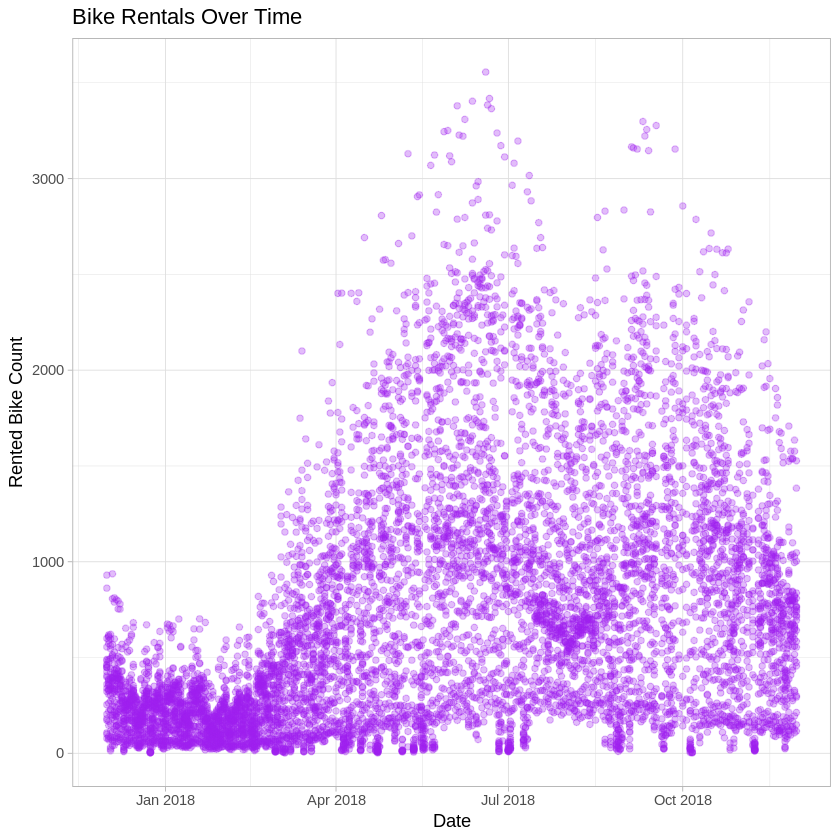

In [13]:
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT)) +
  geom_point(alpha = 0.3, color = "purple") +
  labs(title = "Bike Rentals Over Time",
       x = "Date",
       y = "Rented Bike Count") +
  theme_light()

### Using colour
Let's see if we can enhance some of these features by incorporating colour. Given our observations so far, `HOURS` is a great candidate for this task.  

### Task 11 - Create the same plot of the `RENTED_BIKE_COUNT` time series, but now add `HOURS` as the colour.
### Solution 11


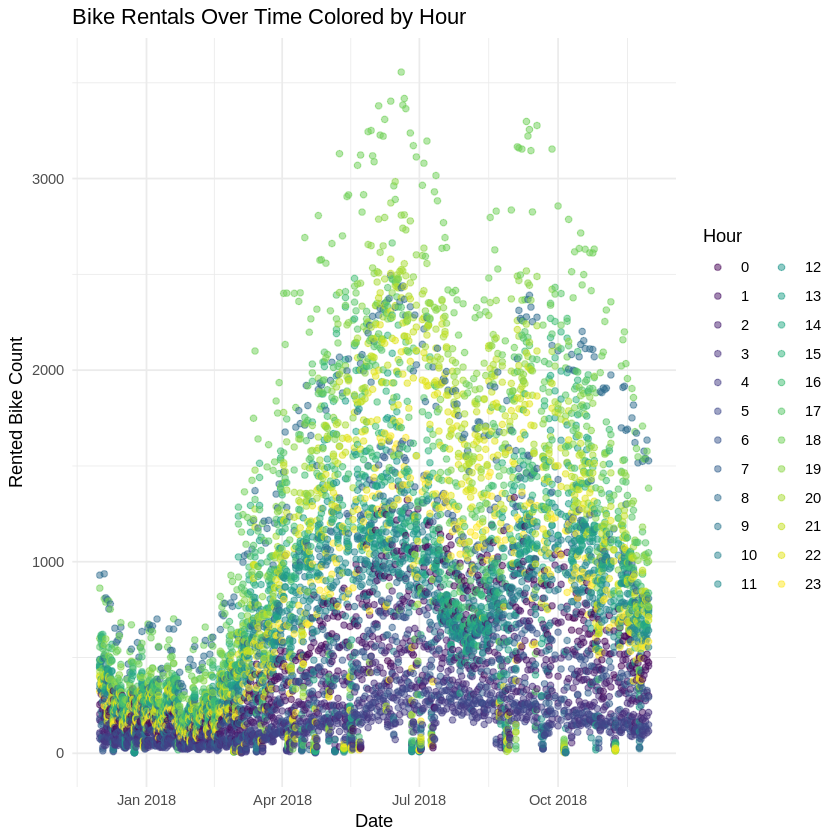

In [14]:
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = as.factor(HOUR))) +
  geom_point(alpha = 0.5) +
  labs(title = "Bike Rentals Over Time Colored by Hour",
       x = "Date",
       y = "Rented Bike Count",
       color = "Hour") +
  theme_minimal()

## Distributions


### Task 12 - Create a histogram overlaid with a kernel density curve
Normalize the histogram so the y axis represents 'density'. This can be done by setting `y=..density..` in the aesthetics of the histogram.


### Solution 12


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


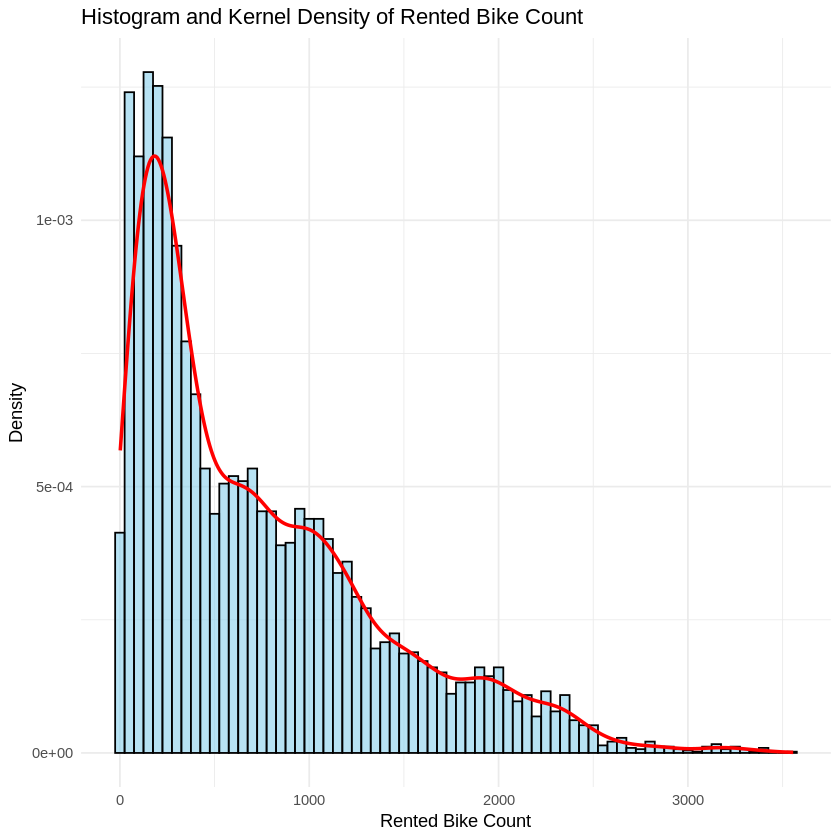

In [15]:
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT)) +
  geom_histogram(aes(y = ..density..), binwidth = 50, fill = "skyblue", color = "black", alpha = 0.6) +
  geom_density(color = "red", size = 1) +
  labs(title = "Histogram and Kernel Density of Rented Bike Count",
       x = "Rented Bike Count",
       y = "Density") +
  theme_minimal()

## Correlation between two variables (scatter plot)
### Task 13 - Use a scatter plot to visualize the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` by `SEASONS`.
Start with `RENTED_BIKE_COUNT` vs. `TEMPERATURE`, then generate four plots corresponding to the `SEASONS` by adding a `facet_wrap()` layer.
Also, make use of colour and opacity to emphasize any patterns that emerge. Use `HOUR` as the color.

### Solution 13


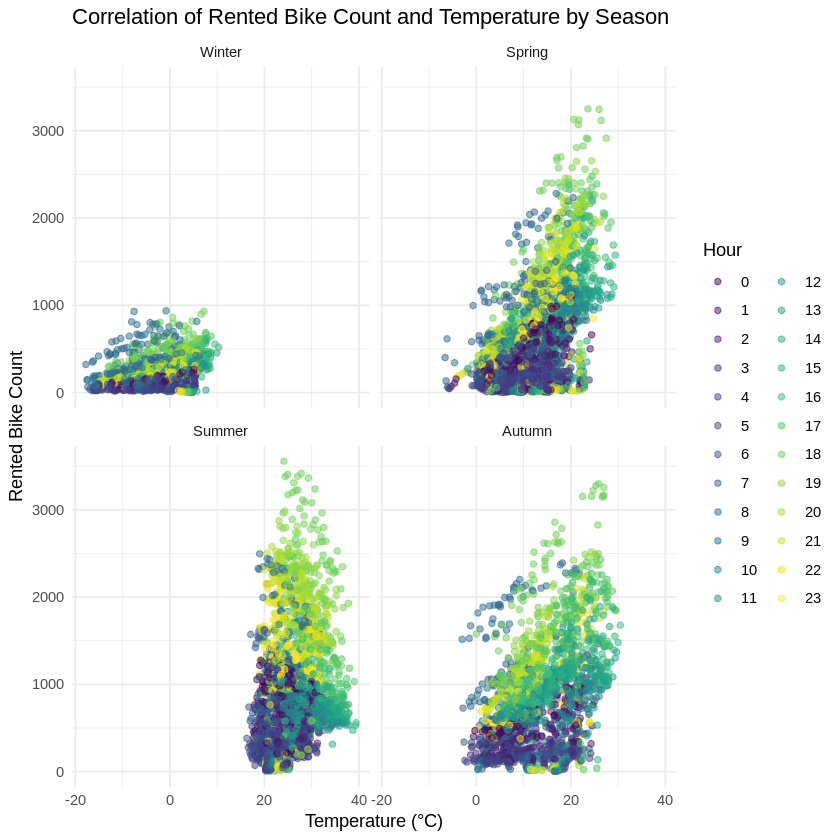

In [16]:
ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = as.factor(HOUR))) +
  geom_point(alpha = 0.5) +
  facet_wrap(~ SEASONS) +
  scale_color_viridis_d(name = "Hour") +
  labs(title = "Correlation of Rented Bike Count and Temperature by Season",
       x = "Temperature (°C)",
       y = "Rented Bike Count") +
  theme_minimal()

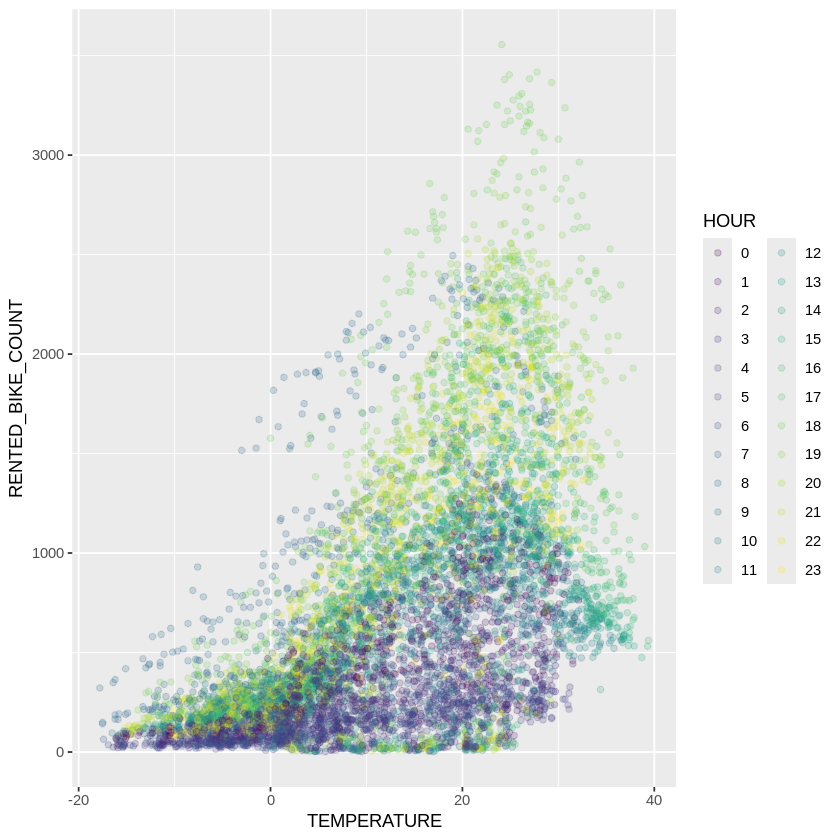

In [17]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)

## Outliers (boxplot)
### Task 14 - Create a display of four boxplots of `RENTED_BIKE_COUNT` vs. `HOUR` grouped by `SEASONS`.
Use `facet_wrap` to generate four plots corresponding to the seasons.

### Solution 14


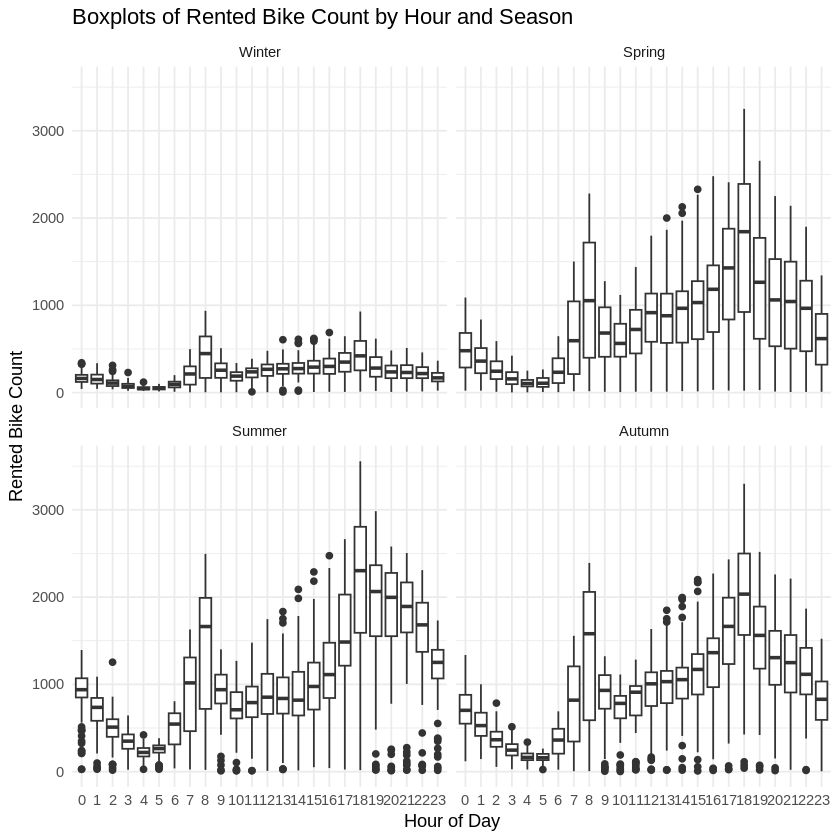

In [18]:
ggplot(seoul_bike_sharing, aes(x = HOUR, y = RENTED_BIKE_COUNT)) +
  geom_boxplot() +
  facet_wrap(~ SEASONS) +
  labs(title = "Boxplots of Rented Bike Count by Hour and Season",
       x = "Hour of Day",
       y = "Rented Bike Count") +
  theme_minimal()

### Task 15 - Group the data by `DATE`, and use the summarize() function to calculate the daily total rainfall and snowfall.
Also, go ahead and plot the results.
### Solution 15


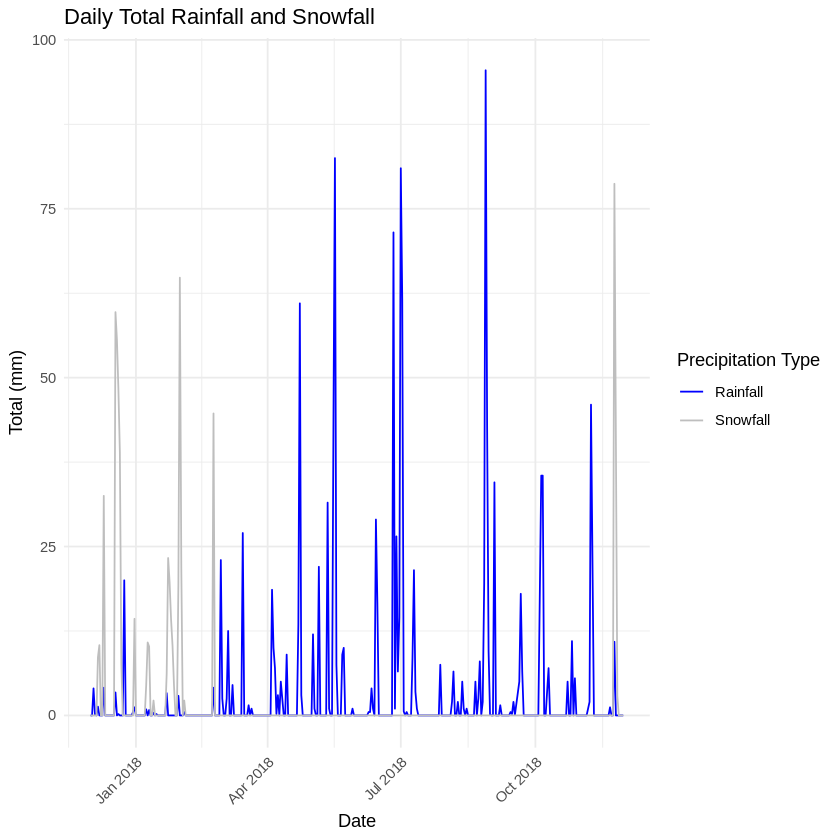

In [19]:
daily_precipitation <- seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarize(
    total_rainfall = sum(RAINFALL, na.rm = TRUE),
    total_snowfall = sum(SNOWFALL, na.rm = TRUE)
  )

ggplot(daily_precipitation, aes(x = DATE)) +
  geom_line(aes(y = total_rainfall, color = "Rainfall")) +
  geom_line(aes(y = total_snowfall, color = "Snowfall")) +
  labs(title = "Daily Total Rainfall and Snowfall",
       x = "Date",
       y = "Total (mm)") +
  scale_color_manual(name = "Precipitation Type",
                     values = c("Rainfall" = "blue", "Snowfall" = "grey")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Task 16 - Determine how many days had snowfall.
### Solution 16


In [20]:
days_with_snowfall <- daily_precipitation %>%
  filter(total_snowfall > 0) %>%
  nrow()

days_with_snowfall

[1] 27